In [681]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [682]:
import os
print(os.getcwd())

/Users/aamirkhan/IronHack/Final


In [683]:
#os.chdir('..')

In [684]:
print(os.getcwd())

/Users/aamirkhan/IronHack/Final


In [685]:
df = pd.read_csv("data/raw/ECommerce.csv")
df

,Additional Order items,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Segment,Customer State,Customer Zipcode,Market,Order Customer Id,Order Date,Order Id,Order Region,Order Item Total,Order Quantity,Product Price,Profit Margin,Profit Per Order,Sales
0,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,$725.00,LATAM,568,17/06/17,61558,South America,$269.98,1,$299.98,26.10%,$78.29,$800.00
1,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,$725.00,LATAM,3341,18/04/17,57472,South America,$269.98,1,$299.98,-5.40%,$-16.20,$800.00
2,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,$680.00,LATAM,7459,24/05/17,59898,Central America,$263.98,1,$299.98,3.90%,$11.62,$800.00
3,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,$680.00,LATAM,7459,24/05/17,59898,Central America,$260.98,1,$299.98,-1.10%,$-3.39,$800.00
4,Hunting & Shooting,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,$725.00,LATAM,10740,05/06/17,58644,Central America,$130.49,1,$149.99,-63.80%,$-95.65,$149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115741,Water Sports,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,"$90,033.00",USCA,2666,13/04/16,32105,US Center,$175.99,1,$199.99,27.50%,$55.09,$199.99
115742,Shop By Sport,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,"$91,786.00",USCA,8100,07/02/16,37555,East of USA,$33.19,1,$39.99,37.40%,$14.94,$39.99
115743,Fishing,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,"$90,033.00",USCA,2666,13/04/16,32105,US Center,$331.98,1,$399.98,39.80%,$159.35,$399.98
115744,Fishing,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,"$90,027.00",USCA,9547,08/06/16,39980,West of USA,$331.98,1,$399.98,24.90%,$99.60,$399.98


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115746 entries, 0 to 115745
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Additional Order items  114722 non-null  object 
 1   Category Name           115746 non-null  object 
 2   Customer City           115746 non-null  object 
 3   Customer Country        115746 non-null  object 
 4   Customer Fname          115746 non-null  object 
 5   Customer Id             115746 non-null  int64  
 6   Customer Segment        115746 non-null  object 
 7   Customer State          115746 non-null  object 
 8   Customer Zipcode        115743 non-null  float64
 9   Market                  115746 non-null  object 
 10  Order Customer Id       115746 non-null  int64  
 11  Order Date              115746 non-null  object 
 12  Order Id                115746 non-null  int64  
 13  Order Region            115746 non-null  object 
 14  Order Item Total    

In [687]:
df.isnull().sum()

Additional Order items    1024
Category Name                0
Customer City                0
Customer Country             0
Customer Fname               0
Customer Id                  0
Customer Segment             0
Customer State               0
Customer Zipcode             3
Market                       0
Order Customer Id            0
Order Date                   0
Order Id                     0
Order Region                 0
Order Item Total             0
Order Quantity               0
Product Price                0
Profit Margin                0
Profit Per Order             0
Sales                        0
dtype: int64

In [688]:
#Dropping duplicate column

df.drop(columns=['Additional Order items'], inplace=True)

In [689]:
#Dropping null values

df = df.dropna().reset_index(drop=True)

In [690]:
df.isnull().sum()

Category Name        0
Customer City        0
Customer Country     0
Customer Fname       0
Customer Id          0
Customer Segment     0
Customer State       0
Customer Zipcode     0
Market               0
Order Customer Id    0
Order Date           0
Order Id             0
Order Region         0
Order Item Total     0
Order Quantity       0
Product Price        0
Profit Margin        0
Profit Per Order     0
Sales                0
dtype: int64

In [691]:
df.drop_duplicates(inplace=True)

In [692]:
#Change format for Zipcode, Date, Profit Margin

In [693]:
df["Customer Zipcode"]=df["Customer Zipcode"].astype(int)
df["Order Date"] = pd.to_datetime(df['Order Date'], errors='coerce')

/var/folders/40/tp00qlcd3_7cqs8y8qkf7gbm0000gn/T/ipykernel_9003/1694871171.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df['Order Date'], errors='coerce')


In [694]:
df['Profit Margin'] = df['Profit Margin'].str.replace('%', '').astype(float)


In [695]:
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [696]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [697]:
df['customer_city'] = df['customer_city'].str.title()

In [698]:
df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_customer_id,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,568,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,3341,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,7459,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,7459,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,10740,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2666,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,8100,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2666,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,9547,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98


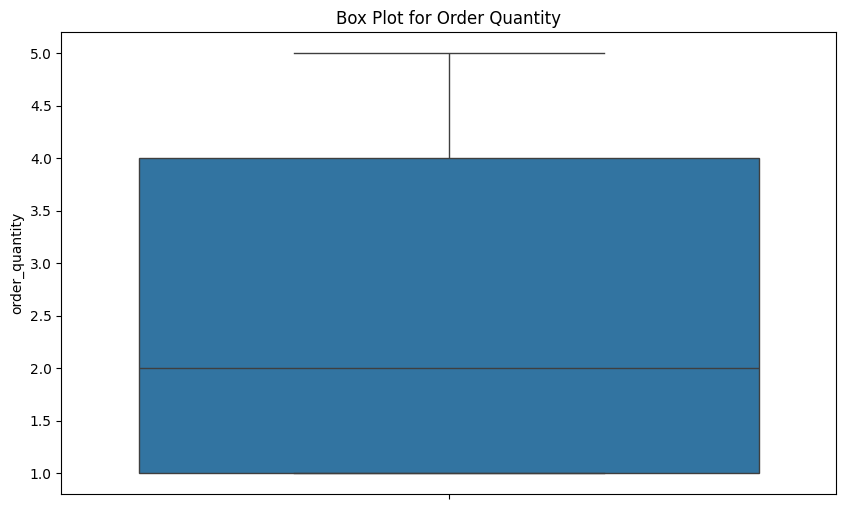

In [699]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='order_quantity')
plt.title('Box Plot for Order Quantity')
plt.show()

In [700]:
df["order_quantity"].unique()

array([1, 2, 3, 5, 4])

In [701]:
print("\nCleaned DataFrame Overview:")
print(df.head())
print("\nData Types After Cleaning:")
print(df.dtypes)
print("\nNull Values After Cleaning:")
print(df.isnull().sum())


Cleaned DataFrame Overview:
        category_name customer_city customer_country customer_fname  \
0    Camping & Hiking        Caguas      Puerto Rico           Sean   
1    Camping & Hiking        Caguas      Puerto Rico          Carol   
2    Camping & Hiking      Mayaguez      Puerto Rico           Mary   
3    Camping & Hiking      Mayaguez      Puerto Rico           Mary   
4  Hunting & Shooting        Caguas      Puerto Rico           Mary   

   customer_id customer_segment customer_state  customer_zipcode market  \
0          568         Consumer             PR               725  LATAM   
1         3341         Consumer             PR               725  LATAM   
2         7459         Consumer             PR               680  LATAM   
3         7459         Consumer             PR               680  LATAM   
4        10740         Consumer             PR               725  LATAM   

   order_customer_id order_date  order_id     order_region  order_item_total  \
0            

In [702]:
df.duplicated().sum()

np.int64(0)

In [703]:
df.isnull().any()

category_name        False
customer_city        False
customer_country     False
customer_fname       False
customer_id          False
customer_segment     False
customer_state       False
customer_zipcode     False
market               False
order_customer_id    False
order_date           False
order_id             False
order_region         False
order_item_total     False
order_quantity       False
product_price        False
profit_margin        False
profit_per_order     False
sales                False
dtype: bool

In [704]:
df.isna().sum()

category_name        0
customer_city        0
customer_country     0
customer_fname       0
customer_id          0
customer_segment     0
customer_state       0
customer_zipcode     0
market               0
order_customer_id    0
order_date           0
order_id             0
order_region         0
order_item_total     0
order_quantity       0
product_price        0
profit_margin        0
profit_per_order     0
sales                0
dtype: int64

In [705]:
#Remove leading and trailing whitespace from all string columns

df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.str.strip())

In [706]:
df.duplicated().sum()

np.int64(0)

In [707]:
df.order_id.duplicated().any()

np.True_

In [708]:
df.duplicated(subset=['order_id']).sum()

np.int64(73021)

In [709]:
df.columns

Index(['category_name', 'customer_city', 'customer_country', 'customer_fname',
       'customer_id', 'customer_segment', 'customer_state', 'customer_zipcode',
       'market', 'order_customer_id', 'order_date', 'order_id', 'order_region',
       'order_item_total', 'order_quantity', 'product_price', 'profit_margin',
       'profit_per_order', 'sales'],
      dtype='object')

In [710]:
df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_customer_id,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,568,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,3341,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,7459,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,7459,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,10740,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2666,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,8100,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2666,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,9547,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98


In [711]:
df.drop(columns=['order_customer_id'], inplace=True)

In [712]:
df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98


In [713]:
df.reset_index(drop=True)
df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98


In [714]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [715]:
df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00,2017,6
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00,2017,4
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00,2017,5
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00,2017,5
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99,2016,4
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99,2016,7
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98,2016,4
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98,2016,8


In [716]:
df['order_month'].nunique()

12

In [717]:
df['order_year'].unique()

array([2017, 2016], dtype=int32)

In [718]:
df['category_name'].unique()

array(['Camping & Hiking', 'Hunting & Shooting', 'Cleats',
       'Shop By Sport', "Women's Apparel", 'Electronics', 'Boxing & MMA',
       'Cardio Equipment', 'Trade-In', "Kids' Golf Clubs",
       "Men's Footwear", 'Consumer Electronics', 'Cameras', 'Computers',
       'Basketball', 'Soccer', "Girls' Apparel", 'Accessories',
       'Water Sports', 'Indoor/Outdoor Games', 'Golf Shoes', 'Fishing',
       "Women's Clothing", 'Golf Balls', "Children's Clothing",
       "Men's Clothing", 'Crafts', 'Tennis & Racquet',
       'Baseball & Softball', 'Golf Gloves', 'CDs', 'Baby',
       'Golf Apparel', 'Books', "Men's Golf Clubs", 'Hockey', 'Lacrosse',
       'DVDs', "Women's Golf Clubs", 'Pet Supplies', 'Garden', 'Music',
       'Video Games', 'Toys', 'Fitness Accessories', 'Health and Beauty',
       'As Seen on  TV!', 'Sporting Goods', 'Golf Bags & Carts',
       'Strength Training'], dtype=object)

In [719]:
df['category_name'].nunique()

50

In [720]:
#creating new df to make df category changes

dfcategory = df
dfcategory

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00,2017,6
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00,2017,4
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00,2017,5
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00,2017,5
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99,2016,4
115739,Shop By Sport,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99,2016,7
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98,2016,4
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98,2016,8


In [721]:
dfcategory['category_name'].nunique()

50

In [722]:
dfcategory.groupby('category_name')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

,category_name,sales
10,Cardio Equipment,"$4,777,798.83"
18,Fishing,"$4,433,378.44"
9,Camping & Hiking,"$3,142,138.67"
12,Cleats,"$2,826,910.29"
46,Water Sports,"$2,454,120.40"
47,Women's Apparel,"$2,005,800.00"
34,Men's Footwear,"$1,860,676.94"
30,Indoor/Outdoor Games,"$1,828,118.44"
38,Shop By Sport,"$827,409.64"
13,Computers,"$663,000.00"


In [723]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Kids' Golf Clubs", "Men's Golf Clubs", "Women's Golf Clubs", "Golf Balls", "Golf Items", "Golf Bags & Carts"], "Golf Items")

In [724]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Cleats", "Men's Footwear", "Golf Shoes"], "Footwear")

In [725]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Electronics", "Consumer Electronics", "DVDs", "CDs", "Video Games", "Music"], "OtherElectronics")

In [726]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Shop By Sport", "Accessories", "Trade-In", "As Seen on  TV!"], "Others")

In [727]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Strength Training", "Fitness Accessories"], "Fitness")

In [728]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Women's Apparel", "Women's Clothing"], "Women_Apparel")

In [729]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Children's Clothing", "Girls' Apparel", "Baby"], "Kids_Apparel")

In [730]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Baseball & Softball", "Lacrosse", "Hockey", "Basketball", "Soccer"], "Ourdoor Sports")

In [731]:
dfcategory['category_name'] = dfcategory['category_name'].replace(["Women_Apparel", "Kids_Apparel", "Men's Clothing", "Golf Apparel", "Golf Gloves"], "Apparels")

In [732]:
dfcategory.groupby('category_name')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

,category_name,sales
5,Cardio Equipment,"$4,777,798.83"
10,Footwear,"$4,766,725.23"
8,Fishing,"$4,433,378.44"
4,Camping & Hiking,"$3,142,138.67"
0,Apparels,"$2,545,036.49"
23,Water Sports,"$2,454,120.40"
15,Indoor/Outdoor Games,"$1,828,118.44"
17,Others,"$972,807.28"
6,Computers,"$663,000.00"
16,OtherElectronics,"$478,563.71"


In [733]:
dfcategory['category_name'].nunique()

24

In [734]:
dfcategory

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,order_id,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,61558,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00,2017,6
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,57472,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00,2017,4
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00,2017,5
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,59898,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00,2017,5
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,58644,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99,2017,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99,2016,4
115739,Others,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,37555,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99,2016,7
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,32105,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98,2016,4
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,39980,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98,2016,8


In [735]:
# Check the basic statistics to see if data is normalized
print(dfcategory.describe())

       customer_id  customer_zipcode                     order_date  \
count  $115,743.00       $115,743.00                         115743   
mean     $6,714.29        $36,031.65  2016-12-05 18:13:58.112023808   
min          $2.00           $603.00            2016-01-01 00:00:00   
25%      $3,291.00           $725.00            2016-06-19 00:00:00   
50%      $6,506.00        $19,380.00            2016-12-04 00:00:00   
75%      $9,874.00        $78,223.00            2017-05-21 00:00:00   
max     $18,634.00        $99,205.00            2017-12-31 00:00:00   
std      $4,096.74        $37,585.06                            NaN   

         order_id  order_item_total  order_quantity  product_price  \
count $115,743.00       $115,743.00     $115,743.00    $115,743.00   
mean   $48,314.05           $187.19           $2.55        $146.50   
min    $25,005.00             $7.49           $1.00          $9.99   
25%    $36,696.00           $106.59           $1.00         $50.00   
50%    $48

In [736]:
list(set(dfcategory.dtypes.tolist()))

[dtype('O'),
 dtype('float64'),
 dtype('<M8[ns]'),
 dtype('int32'),
 dtype('int64')]

In [737]:
dfcategory.select_dtypes("number").columns

Index(['customer_id', 'customer_zipcode', 'order_id', 'order_item_total',
       'order_quantity', 'product_price', 'profit_margin', 'profit_per_order',
       'sales', 'order_year', 'order_month'],
      dtype='object')

In [738]:
dfcategory.select_dtypes("object").columns

Index(['category_name', 'customer_city', 'customer_country', 'customer_fname',
       'customer_segment', 'customer_state', 'market', 'order_region'],
      dtype='object')

In [739]:
dfcategory.select_dtypes("object").nunique().sort_values(ascending=False)

customer_fname      761
customer_city       562
customer_state       44
category_name        24
order_region         23
market                5
customer_segment      3
customer_country      2
dtype: int64

**Measures of Centrality**

In [740]:
mean_price = dfcategory['sales'].mean()
median_price = dfcategory['sales'].median()
mode_price = dfcategory['sales'].mode()[0]

mean_price, median_price, mode_price

(np.float64(237.96028381931177),
 np.float64(199.9499969),
 np.float64(129.9900055))

- The most frequent (mode) sale price is $129.99

**Measures of Dispersion**

In [741]:
variance_price = dfcategory['sales'].var()
std_dev_price = dfcategory['sales'].std()
min_price = dfcategory['sales'].min()
max_price = dfcategory['sales'].max()
range_price = max_price - min_price
quantiles_price = dfcategory['sales'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(np.float64(37794.78524175251),
 np.float64(194.40880957855924),
 np.float64(9.989999771),
 np.float64(1999.98999),
 np.float64(1989.999990229),
 $0.25   $129.99
 $0.50   $199.95
 $0.75   $299.98
 Name: sales, dtype: float64)

- Variance - 37794
- Deviation - 194.40
- Minimum price - 9.98
- Maximum price - 19999.98
- Range - 1989.99

**Shape of the Distribution**

In [742]:
skewness_price = dfcategory['sales'].skew()
kurtosis_price = dfcategory['sales'].kurtosis()

skewness_price, kurtosis_price

(np.float64(2.526178417450434), np.float64(9.72147422691856))

 - Skewness of 'Sales': (2.52)
 - Kurtosis of 'SalePrice': (9.72)

 - Distribution is right skewed hence high priced items are significant
 - Kurtosis is 9.72 hence 'Sales' distribution has heavier tails and a sharper peak compared to a normal distribution.

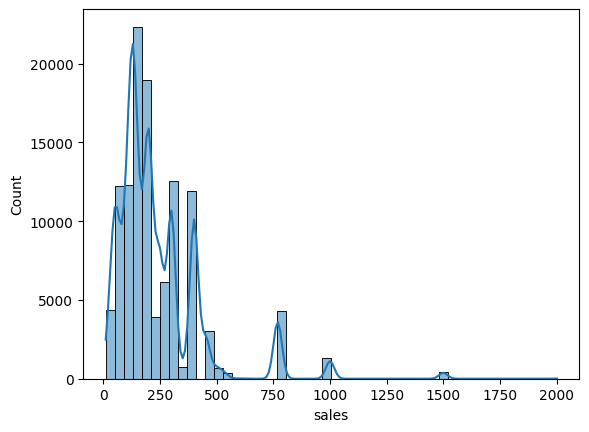

In [743]:
sns.histplot(dfcategory['sales'], kde=True, bins=50);

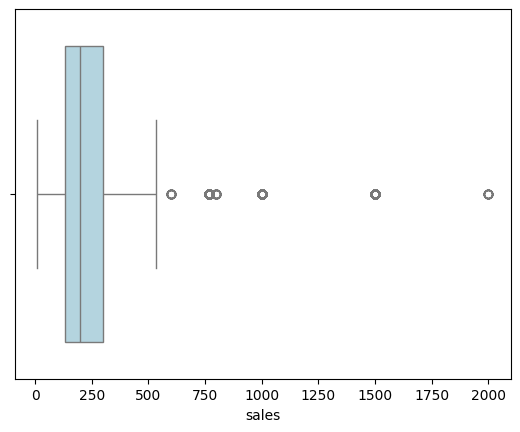

In [744]:
sns.boxplot(x = dfcategory['sales'], color="lightblue");

**Discretization**

In [745]:
bins = [0, 100, 500, 1000, 1500, dfcategory['sales'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['SalePrice_category'] = pd.cut(dfcategory['sales'], bins=bins, labels=labels, include_lowest=True)

In [746]:
df.SalePrice_category.value_counts()

SalePrice_category
Low          86061
Very Low     23194
Medium        6031
High           442
Very High       15
Name: count, dtype: int64

/var/folders/40/tp00qlcd3_7cqs8y8qkf7gbm0000gn/T/ipykernel_9003/1804760621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.SalePrice_category.value_counts().index, y=df.SalePrice_category.value_counts().values, palette='viridis')


<Axes: xlabel='SalePrice_category'>

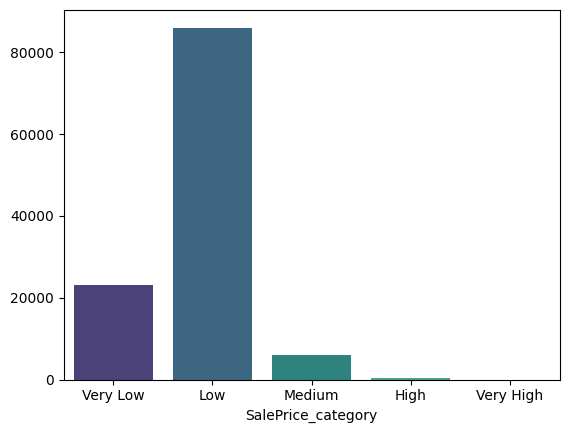

In [747]:
sns.barplot(x=df.SalePrice_category.value_counts().index, y=df.SalePrice_category.value_counts().values, palette='viridis')

The graph shows the prices  

- Low          86061 falling in 100 - 500,
- Very Low     23194 falling in 9 - 99,
- Medium        6031 falling in 500 - 1000,
- High           442 falling in 1000 - 1500, 
- Very High       15 falling in 1500 - 2000

In [748]:
#Independent t-test

from scipy.stats import ttest_ind

df_consumer = dfcategory[dfcategory['customer_segment'] == 'Consumer']['sales']
df_corporate = dfcategory[dfcategory['customer_segment'] == 'Corporate']['sales']

t_stat, p_val = ttest_ind(df_consumer, df_corporate)

print(f"t-statistic: {t_stat}, p-value: {p_val}")

t-statistic: -0.39301053266911884, p-value: 0.6943125825072054


- This p-value is quite large, indicating that the 'Means' of sales between Consumer and Corporate segments are equal and no significant difference 

In [749]:
#ANOVA

from scipy.stats import f_oneway

markets = dfcategory['market'].unique()
sales_groups = [dfcategory[dfcategory['market'] == market]['sales'] for market in markets]

f_stat, p_val = f_oneway(*sales_groups)

print(f"F-statistic: {f_stat}, p-value: {p_val}")

F-statistic: 429.2840031526071, p-value: 0.0


- The low p-value indicates a very low probability that the observed differences in means between the markets are due to random chance. Therefore, we reject the null hypothesis that the means of sales are equal across different markets. This means that there are significant differences in sales among at least some of the markets.

In [750]:
#Chi-Squared Test

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(dfcategory['customer_segment'], dfcategory['market'])

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2-statistic: {chi2_stat}, p-value: {p_val}")

Chi2-statistic: 9.886900496516429, p-value: 0.27305396534927473


- p-value is higher than the common significance level of 0.05. Therefore, we fail to reject the null hypothesis that customer_segment and market are independent. There is not enough evidence to suggest an association between customer segments and markets.

In [751]:
#Correlation coefficient

from scipy.stats import pearsonr

corr, p_val = pearsonr(dfcategory['sales'], dfcategory['profit_per_order'])

print(f"Correlation coefficient: {corr}, p-value: {p_val}")

Correlation coefficient: 0.10588590461181498, p-value: 9.299771415957134e-286


- Correlation coefficient: 0.105 indicates a relationship berween "sales" and "profits", indicating that as sales increase, profit_per_order also slightly increases and vice versa.

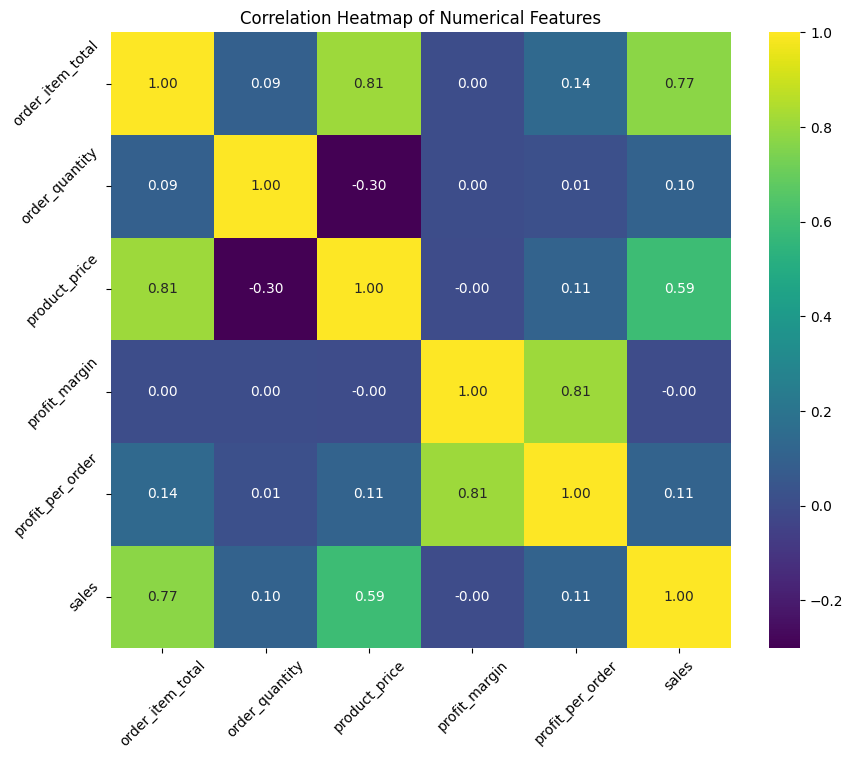

In [752]:
numerical_columns = ['order_item_total', 'order_quantity', 'product_price', 'profit_margin', 'profit_per_order', 'sales']
df_numerical = dfcategory[numerical_columns]

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')

plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [753]:
dfcategory

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,...,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month,SalePrice_category
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,...,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00,2017,6,Medium
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,...,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00,2017,4,Medium
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,...,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00,2017,5,Medium
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,...,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00,2017,5,Medium
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,...,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99,2017,5,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,...,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99,2016,4,Low
115739,Others,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,...,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99,2016,7,Very Low
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,...,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98,2016,4,Low
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,...,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98,2016,8,Low


In [754]:

# Step 1: Calculate Total Revenue and Number of Purchases
total_revenue = dfcategory['sales'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")


total_profit = dfcategory['profit_per_order'].sum()
print(f"Total Profit: ${total_profit:.2f}")


number_of_purchases = dfcategory['order_id'].nunique()
print(f"Number of Purchases: {number_of_purchases}")


# Step 2: Calculate Number of Unique Customers
number_of_customers = dfcategory['customer_id'].nunique()
print(f"Number of Unique Customers: {number_of_customers}")


# Step 3: Calculate Average Purchase Value (APV)
average_purchase_value = total_revenue / number_of_purchases
print(f"Average Purchase Value (APV): ${average_purchase_value:.2f}")


# Step 4: Calculate Average Purchase Frequency Rate (APFR)
average_purchase_frequency_rate = number_of_purchases / number_of_customers
print(f"Average Purchase Frequency Rate (APFR): {average_purchase_frequency_rate:.2f}")


# Step 5: Estimate Customer Value (CV)
customer_value = average_purchase_value * average_purchase_frequency_rate
print(f"Customer Value (CV): ${customer_value:.2f}")


# Step 6: Determine Average Customer Lifespan (ACL)
# For simplicity, we assume a fixed average customer lifespan.
average_customer_lifespan = 2  # years
print(f"Average Customer Lifespan (ACL): {average_customer_lifespan} years")


# Step 7: Calculate Customer Lifetime Value (CLV)
clv = customer_value * average_customer_lifespan
print(f"Customer Lifetime Value (CLV): ${clv:.2f}")



Total Revenue: $27542237.13
Total Profit: $2614066.90
Number of Purchases: 42722
Number of Unique Customers: 18003
Average Purchase Value (APV): $644.69
Average Purchase Frequency Rate (APFR): 2.37
Customer Value (CV): $1529.87
Average Customer Lifespan (ACL): 2 years
Customer Lifetime Value (CLV): $3059.74


In [755]:
#Profit Margin

total_profit = dfcategory['profit_per_order'].sum()
profit_margin = (total_profit / total_revenue) * 100

print(f"Profit Margin: {profit_margin:.2f}%")

Profit Margin: 9.49%


In [756]:
#Product Performance Metrics
product_performance = dfcategory.groupby('category_name').agg({
    'sales': 'sum',
    'profit_per_order': 'sum'
}).reset_index()
print(product_performance)

           category_name         sales  profit_per_order
0               Apparels $2,545,036.49       $291,061.08
1                  Books    $12,587.40           $883.01
2           Boxing & MMA    $67,175.25         $7,065.07
3                Cameras   $267,607.69        $30,289.80
4       Camping & Hiking $3,142,138.67       $261,896.18
5       Cardio Equipment $4,777,798.83       $245,428.10
6              Computers   $663,000.00        $69,656.81
7                 Crafts   $223,356.33        $25,531.17
8                Fishing $4,433,378.44       $496,212.12
9                Fitness    $76,675.92         $3,334.84
10              Footwear $4,766,725.23       $526,183.73
11                Garden   $206,641.05        $26,553.26
12            Golf Items   $242,356.07        $25,273.01
13     Health and Beauty    $70,036.56         $5,826.30
14    Hunting & Shooting    $43,922.73         $5,455.68
15  Indoor/Outdoor Games $1,828,118.44       $204,561.40
16      OtherElectronics   $478

**Repeat Purchase Rate = (Number of Repeat Customers / Total Number of Customers) × 100**

In [757]:
#Repeat Purchase Rate
repeat_customers = dfcategory[dfcategory.duplicated('customer_id')]
repeat_purchase_rate = repeat_customers['customer_id'].nunique() / dfcategory['customer_id'].nunique() * 100

print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")

Repeat Purchase Rate: 63.45%


**Market Share by Region**

In [758]:
region_sales = dfcategory.groupby('market')['sales'].sum().reset_index()
total_market_sales = dfcategory['sales'].sum()

region_sales['market_share'] = (region_sales['sales'] / total_market_sales) * 100
print(region_sales)

         market         sales  market_share
0        Africa $2,589,036.34         $9.40
1        Europe $6,958,165.04        $25.26
2         LATAM $6,470,297.01        $23.49
3  Pacific Asia $6,030,677.98        $21.90
4          USCA $5,494,060.75        $19.95


**Average profit per order**

In [759]:
#Average profit per order
average_profit_per_order = dfcategory['profit_per_order'].mean()

print(f"Average Profit Per Order: ${average_profit_per_order:.2f}")

Average Profit Per Order: $22.59


In [760]:
#Top Categories by Revenue and Profit
top_categories = dfcategory.groupby('category_name').agg({
    'sales': 'sum',
    'profit_per_order': 'sum'
}).sort_values(by='sales', ascending=False).reset_index()

print(top_categories.head(10))

          category_name         sales  profit_per_order
0      Cardio Equipment $4,777,798.83       $245,428.10
1              Footwear $4,766,725.23       $526,183.73
2               Fishing $4,433,378.44       $496,212.12
3      Camping & Hiking $3,142,138.67       $261,896.18
4              Apparels $2,545,036.49       $291,061.08
5          Water Sports $2,454,120.40       $211,376.62
6  Indoor/Outdoor Games $1,828,118.44       $204,561.40
7                Others   $972,807.28        $94,024.88
8             Computers   $663,000.00        $69,656.81
9      OtherElectronics   $478,563.71        $50,692.84


In [761]:
#dfcategory.to_csv('dfcategory.csv')

In [762]:
total_revenue_per_year = dfcategory.groupby('order_year')['sales'].sum().reset_index()
pd.options.display.float_format = '${:,.2f}'.format
total_revenue_per_year

,order_year,sales
0,2016,"$13,433,161.56"
1,2017,"$14,109,075.57"


In [763]:
total_revenue_per_year['sales'].pct_change() * 100

0     NaN
1   $5.03
Name: sales, dtype: float64

In [764]:
total_profit_per_year = dfcategory.groupby('order_year')['profit_per_order'].sum().reset_index()
pd.options.display.float_format = '${:,.2f}'.format
total_profit_per_year

,order_year,profit_per_order
0,2016,"$1,310,119.07"
1,2017,"$1,303,947.83"


In [765]:
total_profit_per_year['profit_per_order'].pct_change() * 100

0      NaN
1   $-0.47
Name: profit_per_order, dtype: float64

In [766]:
top_categories.head(5)

,category_name,sales,profit_per_order
0,Cardio Equipment,"$4,777,798.83","$245,428.10"
1,Footwear,"$4,766,725.23","$526,183.73"
2,Fishing,"$4,433,378.44","$496,212.12"
3,Camping & Hiking,"$3,142,138.67","$261,896.18"
4,Apparels,"$2,545,036.49","$291,061.08"


In [767]:
top_categories.tail(3)

,category_name,sales,profit_per_order
21,Pet Supplies,"$20,762.40","$1,845.05"
22,Books,"$12,587.40",$883.01
23,Toys,"$2,919.62",$457.19


In [768]:
dfcategory

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,...,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month,SalePrice_category
0,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725,LATAM,2017-06-17,...,South America,$269.98,1,$299.98,$26.10,$78.29,$800.00,2017,6,Medium
1,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725,LATAM,2017-04-18,...,South America,$269.98,1,$299.98,$-5.40,$-16.20,$800.00,2017,4,Medium
2,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,...,Central America,$263.98,1,$299.98,$3.90,$11.62,$800.00,2017,5,Medium
3,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680,LATAM,2017-05-24,...,Central America,$260.98,1,$299.98,$-1.10,$-3.39,$800.00,2017,5,Medium
4,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725,LATAM,2017-05-06,...,Central America,$130.49,1,$149.99,$-63.80,$-95.65,$149.99,2017,5,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115738,Water Sports,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,...,US Center,$175.99,1,$199.99,$27.50,$55.09,$199.99,2016,4,Low
115739,Others,Upland,United States,Victoria,8100,Corporate,CA,91786,USCA,2016-07-02,...,East of USA,$33.19,1,$39.99,$37.40,$14.94,$39.99,2016,7,Very Low
115740,Fishing,Los Angeles,United States,Mary,2666,Corporate,CA,90033,USCA,2016-04-13,...,US Center,$331.98,1,$399.98,$39.80,$159.35,$399.98,2016,4,Low
115741,Fishing,Los Angeles,United States,Mary,9547,Corporate,CA,90027,USCA,2016-08-06,...,West of USA,$331.98,1,$399.98,$24.90,$99.60,$399.98,2016,8,Low


In [769]:
top_categories = dfcategory.groupby('category_name').agg({
    'sales': 'sum',
    'profit_per_order': 'sum'
}).sort_values(by='sales', ascending=False).reset_index()

print(top_categories.head(5))



      category_name         sales  profit_per_order
0  Cardio Equipment $4,777,798.83       $245,428.10
1          Footwear $4,766,725.23       $526,183.73
2           Fishing $4,433,378.44       $496,212.12
3  Camping & Hiking $3,142,138.67       $261,896.18
4          Apparels $2,545,036.49       $291,061.08


In [770]:
customer_counts = dfcategory.groupby('market')['customer_id'].nunique().reset_index()
customer_counts

,market,customer_id
0,Africa,3311
1,Europe,8379
2,LATAM,6174
3,Pacific Asia,9374
4,USCA,6256


In [771]:
import pandas as pd

# Assuming df is your DataFrame
# Group by 'market' to calculate total orders (assuming each row is an order)
total_orders_by_market = dfcategory['market'].value_counts().reset_index()
total_orders_by_market.columns = ['market', 'total_orders']

# Group by 'market' to calculate the total unique customers
total_customers_by_market = dfcategory.groupby('market')['customer_id'].nunique().reset_index()
total_customers_by_market.columns = ['market', 'total_customers']

# Merge the two DataFrames
market_summary = pd.merge(total_orders_by_market, total_customers_by_market, on='market')

print(market_summary)

         market  total_orders  total_customers
0  Pacific Asia         27175             9374
1         LATAM         25819             6174
2          USCA         25799             6256
3        Europe         25336             8379
4        Africa         11614             3311


In [772]:
# Calculate the correlation between total orders and total customers
correlation = market_summary['total_orders'].corr(market_summary['total_customers'])
print(f"Correlation between total orders and total customers by market: {correlation}")

Correlation between total orders and total customers by market: 0.8389116347386364


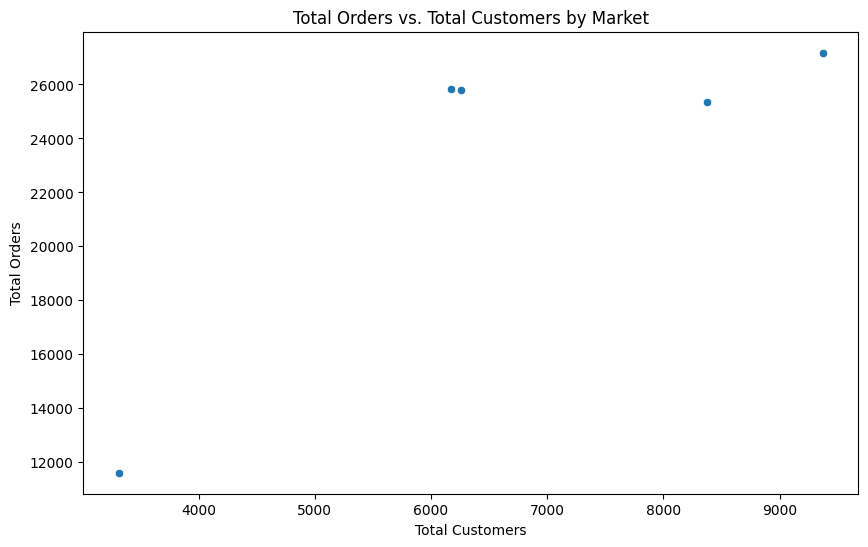

In [773]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot showing the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=market_summary, x='total_customers', y='total_orders')
plt.title('Total Orders vs. Total Customers by Market')
plt.xlabel('Total Customers')
plt.ylabel('Total Orders')
plt.show()

In [774]:
from scipy.stats import pearsonr

# Pearson's correlation test between 'sales' and 'quantity'
correlation_coef, p_value = pearsonr(dfcategory['sales'], dfcategory['order_quantity'])
print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

Correlation Coefficient: 0.10157696812492213
P-value: 4.9927130469583034e-263


In [775]:
p500_df = dfcategory[dfcategory['product_price'] > 500]
p500_df

,category_name,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,market,order_date,...,order_region,order_item_total,order_quantity,product_price,profit_margin,profit_per_order,sales,order_year,order_month,SalePrice_category
92,Computers,Caguas,Puerto Rico,Alma,14287,Consumer,PR,725,Europe,2017-10-29,...,Northern Europe,"$1,417.50",1,"$1,500.00",$39.70,$595.35,"$1,500.00",2017,10,High
95,Computers,Caguas,Puerto Rico,Alyssa,14322,Consumer,PR,725,Europe,2017-10-30,...,Northern Europe,"$1,395.00",1,"$1,500.00",$3.70,$55.80,"$1,500.00",2017,10,High
100,Computers,Caguas,Puerto Rico,Audrey,14087,Consumer,PR,725,Europe,2017-10-26,...,Western Europe,"$1,365.00",4,"$1,500.00",$5.70,$86.00,"$1,500.00",2017,10,High
112,Computers,Caguas,Puerto Rico,Winifred,14097,Consumer,PR,725,Europe,2017-10-26,...,Northern Europe,"$1,200.00",4,"$1,500.00",$6.00,$90.00,"$1,500.00",2017,10,High
114,Ourdoor Sports,Caguas,Puerto Rico,John,778,Consumer,PR,725,Europe,2017-10-02,...,Western Europe,$989.99,4,$999.99,$41.60,$415.80,$999.99,2017,10,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114759,Garden,Lynnwood,United States,Avye,15393,Corporate,WA,98037,Pacific Asia,2017-11-14,...,Southeast Asia,$521.93,1,$532.58,$28.40,$151.36,$532.58,2017,11,Medium
114814,Garden,Orange Park,United States,Linda,15478,Corporate,FL,32073,Pacific Asia,2017-11-15,...,Oceania,$495.30,1,$532.58,$-71.30,$-379.89,$532.58,2017,11,Medium
114815,Garden,Lakewood,United States,Karleigh,15658,Corporate,NJ,8701,Pacific Asia,2017-11-18,...,Oceania,$495.30,1,$532.58,$45.60,$242.70,$532.58,2017,11,Medium
114845,Garden,Newark,United States,Sylvia,15428,Corporate,OH,43055,Pacific Asia,2017-11-15,...,South Asia,$516.60,1,$532.58,$29.10,$154.98,$532.58,2017,11,Medium


In [776]:
p500_df.groupby('category_name').size().reset_index(name='count')

,category_name,count
0,Computers,442
1,Fitness,25
2,Garden,388
3,Golf Items,11
4,Ourdoor Sports,10


In [777]:
grouped_by_category = p500_df.groupby('category_name').agg({
    'sales': 'sum',
    'order_quantity': 'sum'
}).reset_index()

# Display the result
print(grouped_by_category)

    category_name       sales  order_quantity
0       Computers $663,000.00            1047
1         Fitness  $35,999.75              61
2          Garden $206,641.05             876
3      Golf Items   $6,599.89              19
4  Ourdoor Sports   $9,999.90              21


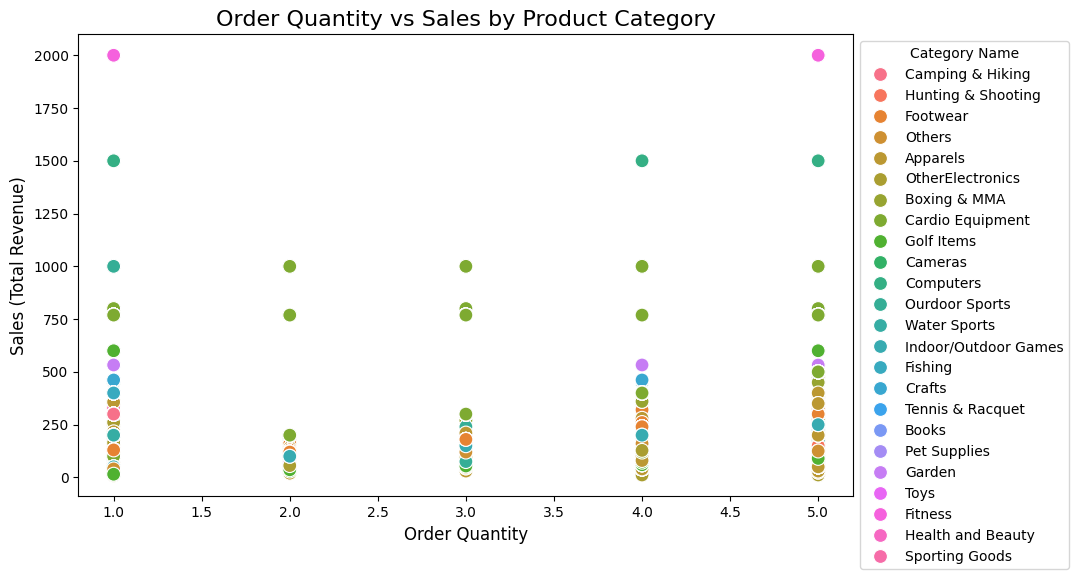

In [778]:

# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfcategory, x='order_quantity', y='sales', s=100, hue='category_name')

# Add labels and title
plt.title('Order Quantity vs Sales by Product Category', fontsize=16)
plt.xlabel('Order Quantity', fontsize=12)
plt.ylabel('Sales (Total Revenue)', fontsize=12)
plt.legend(title='Category Name', bbox_to_anchor=(1, 1))

plt.show()

In [779]:
dfcategory["order_quantity"].sum()

np.int64(295319)

In [780]:
dfcategory["profit_per_order"].sum()

np.float64(2614066.9028039915)

In [781]:
dfcategory.groupby('market')['customer_id'].nunique().reset_index()

,market,customer_id
0,Africa,3311
1,Europe,8379
2,LATAM,6174
3,Pacific Asia,9374
4,USCA,6256


In [782]:
dfcategory['customer_id'].nunique()

18003

In [784]:
dfcategory['sales'].count()

np.int64(115743)